This project is original from Poma Mikhail 
link: https://www.kaggle.com/code/ambisinistra/visualization-and-analysis-of-oscar-data-by-python 

In [2]:
#import libraries
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('C:/Users/66959/Desktop/portfolio/project/the_oscar_award.csv')
director = pd.read_csv('C:/Users/66959/Desktop/portfolio/project/Oscar_Winners_Director.csv')
#The first data doesn't have information about gender and race of director so I added another ones.

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Checking how the data looks 

In [3]:
data.head(10)

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
5,1927,1928,1,ART DIRECTION,Rochus Gliese,Sunrise,False
6,1927,1928,1,ART DIRECTION,William Cameron Menzies,The Dove;,True
7,1927,1928,1,ART DIRECTION,Harry Oliver,7th Heaven,False
8,1927,1928,1,CINEMATOGRAPHY,George Barnes,The Devil Dancer;,False
9,1927,1928,1,CINEMATOGRAPHY,Charles Rosher,Sunrise,True


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10759 entries, 0 to 10758
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10759 non-null  int64 
 1   year_ceremony  10759 non-null  int64 
 2   ceremony       10759 non-null  int64 
 3   category       10759 non-null  object
 4   name           10756 non-null  object
 5   film           10449 non-null  object
 6   winner         10639 non-null  object
dtypes: int64(3), object(4)
memory usage: 588.5+ KB
None


From the above we knew that the result of Oscar 95th is not come out yet. So, I will delete data from row 10641 to 10760 which is the data of Oscar 95th.

In [5]:
data = pd.DataFrame(data)
oscar =data.drop(data.index[10641:10760])

In [6]:
oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10641 entries, 0 to 10640
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10641 non-null  int64 
 1   year_ceremony  10641 non-null  int64 
 2   ceremony       10641 non-null  int64 
 3   category       10641 non-null  object
 4   name           10638 non-null  object
 5   film           10331 non-null  object
 6   winner         10639 non-null  object
dtypes: int64(3), object(4)
memory usage: 582.1+ KB


In [7]:
oscar['category']=oscar['category'].apply(lambda x:x.strip())
oscar['film']=oscar['film'].apply(lambda x: np.NaN if str(x)=='nan' else str(x).strip())

oscar['category']=oscar['category'].apply(lambda x:x.capitalize())

nameRole=oscar['name'].str.split(',',expand=True)
nameRole=nameRole.rename(columns={0:'one_of_the_names'})

oscar=pd.concat([oscar,nameRole['one_of_the_names']],axis=1)

In [18]:
#Film information
All_movie=oscar[['film','winner']].groupby(by='film').sum().sort_values(by='winner',ascending=False)
All_movie['Awards']=All_movie['winner'].apply(lambda x:int(x))
del All_movie['winner']
All_movie['Nominations']=oscar[['film','winner']].groupby(by='film').count()
All_movie['Winnin_rate']=(All_movie['Awards']/All_movie['Nominations'])*100

print(All_movie.head(5))

                                               Awards  Nominations  \
film                                                                 
Titanic                                            12           16   
Ben-Hur                                            11           12   
The Lord of the Rings: The Return of the King      11           11   
West Side Story                                    11           18   
The Last Emperor                                    9            9   

                                               Winnin_rate  
film                                                        
Titanic                                          75.000000  
Ben-Hur                                          91.666667  
The Lord of the Rings: The Return of the King   100.000000  
West Side Story                                  61.111111  
The Last Emperor                                100.000000  


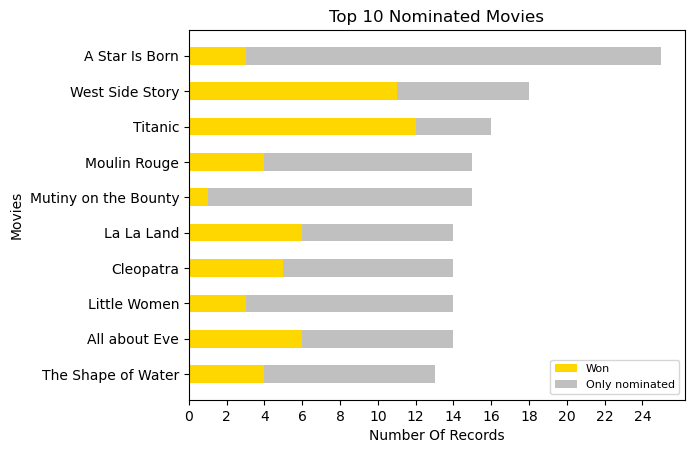

In [9]:
#Top 10 Nominated Movies
nominated_movie=All_movie.sort_values(by='Nominations',ascending=False).head(10)
nominated_movie['Diff']=nominated_movie['Nominations']-nominated_movie['Awards']
nominated_movie=nominated_movie.sort_values(by='Nominations')
vis1=plt.barh(nominated_movie.index.tolist(), nominated_movie['Awards'], 0.5,color = 'gold', label = 'Won')
vis1=plt.barh(nominated_movie.index.tolist(), nominated_movie['Diff'],0.5, color = 'silver', left = nominated_movie['Awards'], label = 'Only nominated')

plt.xlabel('Number Of Records')
plt.ylabel('Movies')

plt.xticks(range(0,max(nominated_movie['Nominations']),2))
plt.legend(loc='lower right',fontsize=8)
plt.title('Top 10 Nominated Movies')

plt.show()

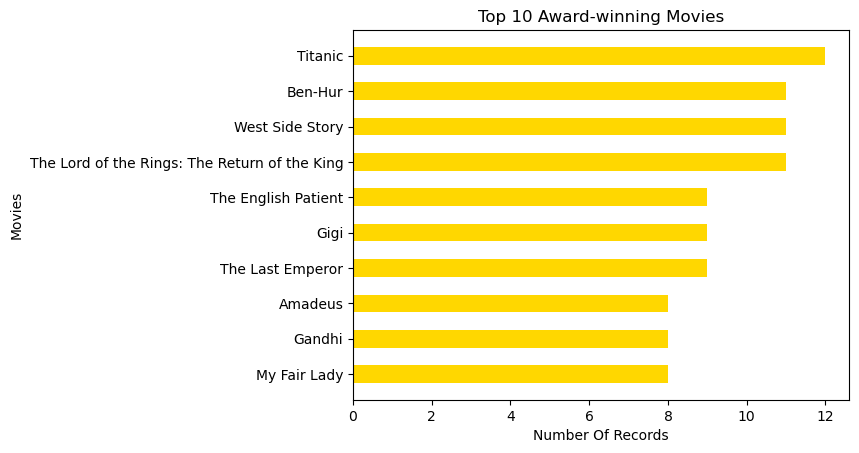

In [10]:
#Top 10 Award-winning Movies
Award_winning_movie=All_movie.sort_values(by='Awards',ascending=False).head(10)
Award_winning_movie=Award_winning_movie.sort_values(by='Awards')
movie_name=Award_winning_movie.index.tolist()

count_award=Award_winning_movie['Awards'].to_list()


vis2= plt.barh(movie_name,count_award,height=0.5, color = 'gold')
plt.xlabel('Number Of Records')
plt.ylabel('Movies')
plt.title('Top 10 Award-winning Movies')
plt.xticks(range(0,max(Award_winning_movie['Awards'])+2,2))
plt.show()


In [11]:
#winner information
nominated_person=oscar['one_of_the_names'].value_counts()
nominated_person=pd.DataFrame(nominated_person)

nominated_person['Awards']=oscar.loc[oscar.winner==1,['one_of_the_names','winner']].groupby(by='one_of_the_names').count()

print(nominated_person.head(10))

                                             one_of_the_names  Awards
Metro-Goldwyn-Mayer                                        64    12.0
Walt Disney                                                60    23.0
John Williams                                              44     4.0
Warner Bros.                                               43     7.0
Alfred Newman                                              41     9.0
France                                                     37     9.0
Edith Head                                                 34     8.0
Art Direction:  Cedric Gibbons                             28     8.0
Italy                                                      28    10.0
Metro-Goldwyn-Mayer Studio Sound Department                27     8.0


We'll find top 10 winner ranked by production/individual

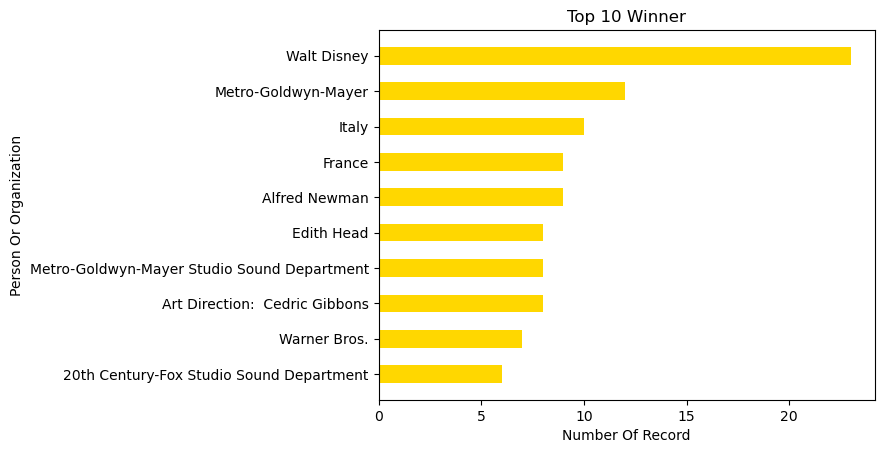

In [12]:
#Top 10 Winner
topTenAwardsP=nominated_person.sort_values(by='Awards',ascending=False).head(10)
topTenAwardsP=topTenAwardsP.sort_values(by='Awards')
#print(topTenAwardsP)
person_name=topTenAwardsP.index.tolist()

count_award=topTenAwardsP['Awards'].to_list()

vis2= plt.barh(person_name,count_award,height=0.5, color = 'gold')
plt.xlabel('Number Of Record')
plt.ylabel('Person Or Organization')
plt.title('Top 10 Winner')
#plt.xticks(range(0,int(max(topTenAwardsP['Awards']))+2))

plt.show()


The data for this part is about Gender, Race and Director Trends from 1930-2019 which is collect by Priyanka Dobhal

In [13]:
#Checking how the data looks
director.head(10)

,index,Year,Gender,Race,Director(s),Film,Nomination/Winner
0,0,1927/28,Male,White,Frank Borzage (Dramatic Picture),7th Heaven,Winner
1,1,1927/28,Male,White,Herbert Brenon(Dramatic Picture),Sorrell and Son,Nomination
2,2,1927/28,Male,White,King Vidor(Dramatic Picture),The Crowd,Nomination
3,3,1927/28,Male,White,Lewis Milestone (Comedy Picture),Two Arabian Knights,Winner
4,4,1927/28,Male,White,Ted Wilde(Comedy Picture),Speedy,Nomination
5,5,1928/1929,Male,White,Frank Lloyd,The Divine Lady,Winner
6,6,1928/1929,Male,White,Lionel Barrymore,Madame X,Nomination
7,7,1928/1929,Male,White,Harry Beaumont,The Broadway Melody,Nomination
8,8,1928/1929,Male,White,Irving Cummings,In Old Arizona,Nomination
9,9,1928/1929,Male,White,Frank Lloyd,Drag,Nomination


In [14]:
director.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              456 non-null    int64 
 1   Year               455 non-null    object
 2   Gender             455 non-null    object
 3   Race               455 non-null    object
 4   Director(s)        455 non-null    object
 5   Film               455 non-null    object
 6   Nomination/Winner  455 non-null    object
dtypes: int64(1), object(6)
memory usage: 25.1+ KB


By race

In [15]:
a = director['Race'].value_counts()
print('', a)

 White    449
Black      6
Name: Race, dtype: int64


By gender

In [16]:
b = director['Gender'].value_counts()
print('', b)

 Male      450
Female      5
Name: Gender, dtype: int64


What we found isn't surprising that most often the Oscar goes to a white man.